# Skewed Randomization using Theoretical Distributions Results 

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from _savings_algorithm import cw_savings
from _random_biased_savings import test_triangular, test_geometrical, test_random_geometrical

## Testing algorithms with theoretical distributions

The analysis is then run to examine the algorithms. First the original algorithm will be run from which it is expected to return the tabulated values. Then 500 replicates of each algorithm will be executed for each of the proposed instances. Of these 500 replicates, the one that returns the lowest cost will be taken as the solution.

The algorithms studied will be the following, on the one hand will study the savings algorithm modified with the selection by triangular distribution. On the other hand, the modified algorithm will be tested with the geometric distribution with the following values for $\beta :\{0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9\}$

What we can observe in the results is the following.

 - On the one hand we can observe a clear malfunctioning of the algorithm that has the triangular distribution as its method of candidate selection. This method surely has a malfunction because its behavior is closer to a random selection because it gives too much probability to the worst candidates.

- On the other hand we can observe that within the alternatives contemplated the best results are in the range [0.2-0.4] this fits a little in the intuition of these functions because they are halfway between the triangular selection and a selection more like the greedy one. Giving a small window to the randomness but keeping the logic behind the heuristic

- Knowing that range of values has the best results we run the alternative that random picks one beta in each iteraion with that range and the proposed range in the paper [0.025, 0.25] (Juan et al., 2010). And we obtain the best solution with the first range.

In [ ]:
instances = filter(lambda x: x.endswith('input_nodes.txt'), os.listdir('../project_data'))
instances = list(map(lambda x: x[: x.find('_')], instances))
instances.sort()

r = 500
costs = {}
for instance in instances:
    original_solution = cw_savings(instance)
    triangular_solution = test_triangular(instance, r)
    geometrical_solution_1 = test_geometrical(instance, 0.1, r)
    geometrical_solution_2 = test_geometrical(instance, 0.2, r)
    geometrical_solution_3 = test_geometrical(instance, 0.3, r)
    geometrical_solution_4 = test_geometrical(instance, 0.4, r)
    geometrical_solution_5 = test_geometrical(instance, 0.5, r)
    geometrical_solution_6 = test_geometrical(instance, 0.6, r)
    geometrical_solution_7 = test_geometrical(instance, 0.7, r)
    geometrical_solution_8 = test_geometrical(instance, 0.8, r)
    geometrical_solution_9 = test_geometrical(instance, 0.9, r)
    costs[instance] = {'original': original_solution.cost,
                       'triangular n = 100': triangular_solution.cost,
                       'geometrical n=100, beta=0.1':geometrical_solution_1.cost, 
                       'geometrical n=100, beta=0.2':geometrical_solution_2.cost, 
                       'geometrical n=100, beta=0.3':geometrical_solution_3.cost,
                       'geometrical n=100, beta=0.4':geometrical_solution_4.cost, 
                       'geometrical n=100, beta=0.5':geometrical_solution_5.cost, 
                       'geometrical n=100, beta=0.6':geometrical_solution_6.cost,
                       'geometrical n=100, beta=0.7':geometrical_solution_7.cost,
                       'geometrical n=100, beta=0.8':geometrical_solution_8.cost,
                       'geometrical n=100, beta=0.9':geometrical_solution_9.cost}

#pd.DataFrame(costs).T.to_csv('../project_miscellany/data_sets/theorical_distributions_results_3.csv')

## Testing algorithms with random selection of beta for geometric distribution

In [ ]:
instances = filter(lambda x: x.endswith('input_nodes.txt'), os.listdir('../project_data'))
instances = list(map(lambda x: x[: x.find('_')], instances))
instances.sort()

costs = {}
for instance in instances:
    original_solution = cw_savings(instance)
    random_geometrical_solution_1 = test_random_geometrical(instance, 0.05, 0.25, 500)
    random_geometrical_solution_2 = test_random_geometrical(instance, 0.2, 0.4, 500)
    costs[instance] = {'original': original_solution.cost,
                       'random_geometrical n=100, beta=[0.05, 0.25]':random_geometrical_solution_1.cost, 
                       'random_geometrical n=100, beta=[0.2, 0.4]':random_geometrical_solution_2.cost}

#pd.DataFrame(costs).T.to_csv('../project_miscellany/data_sets/random_th_distributions_results_n_500.csv')

## Results

In [2]:
r_results = pd.read_csv('../project_miscellany/data_sets/random_th_distributions_results_n_500.csv', index_col=0)
t_results = pd.read_csv('../project_miscellany/data_sets/th_distributions_results_n_500.csv', index_col=0)
results = pd.merge(t_results, r_results.iloc[:, 1:], left_index=True, right_index=True)

In [3]:
inverse = results.iloc[:, 0].apply(lambda x: 1/x)
scaled = pd.DataFrame(np.array(inverse).reshape(1, -1).T  * np.array(results))
scaled.columns = results.columns
scaled.index = results.index
scaled

,original,triangular n=500,"geometrical n=500, beta=0.1","geometrical n=500, beta=0.2","geometrical n=500, beta=0.3","geometrical n=500, beta=0.4","geometrical n=500, beta=0.5","geometrical n=500, beta=0.6","geometrical n=500, beta=0.7","geometrical n=500, beta=0.8","geometrical n=500, beta=0.9","random_geometrical n=500, beta=[0.05, 0.25]","random_geometrical n=500, beta=[0.2, 0.4]"
A-n32-k5,1.0,1.679444,0.968857,0.957422,0.950001,0.933049,0.949875,0.949842,0.978615,0.984573,0.988352,0.952197,0.949431
A-n38-k5,1.0,1.895624,1.010774,0.995675,0.997050,0.997517,0.997517,0.997517,0.997517,0.997517,0.997517,0.992249,0.997253
A-n45-k7,1.0,1.602454,0.980588,0.968084,0.968192,0.967458,0.967458,0.968192,0.968192,0.971922,0.972656,0.968192,0.967458
A-n55-k9,1.0,2.024659,1.000858,1.000864,0.997653,0.996858,0.996858,0.996858,0.996858,0.996858,0.996858,0.989840,0.997590
A-n60-k9,1.0,1.874045,0.981248,0.965953,0.962320,0.961856,0.962574,0.962569,0.962857,0.962857,0.967798,0.962393,0.961007
A-n61-k9,1.0,1.980066,0.966297,0.959196,0.951921,0.955225,0.956297,0.953246,0.958692,0.960598,0.960598,0.956331,0.953827
A-n65-k9,1.0,2.114721,0.995289,0.969108,0.969011,0.966172,0.966172,0.966172,1.000000,1.000000,1.000000,0.972042,0.966172
A-n80-k10,1.0,1.996366,0.977412,0.972416,0.972416,0.972330,0.972330,0.972330,0.972330,0.972597,0.985381,0.972150,0.973022
B-n50-k7,1.0,2.245992,1.024728,1.004855,0.997597,0.994342,0.994324,0.994041,0.994041,0.994324,0.994041,1.000978,0.998491
B-n52-k7,1.0,2.510791,0.999196,0.992651,0.994196,0.992511,0.995361,0.997468,0.997468,0.997468,0.997468,0.995847,0.990497


In [4]:
scaled.mean()

original                                       1.000000
triangular n=500                               2.190099
geometrical n=500, beta=0.1                    0.984208
geometrical n=500, beta=0.2                    0.972798
geometrical n=500, beta=0.3                    0.973105
geometrical n=500, beta=0.4                    0.972516
geometrical n=500, beta=0.5                    0.974777
geometrical n=500, beta=0.6                    0.977257
geometrical n=500, beta=0.7                    0.980461
geometrical n=500, beta=0.8                    0.983722
geometrical n=500, beta=0.9                    0.985421
random_geometrical n=500, beta=[0.05, 0.25]    0.974617
random_geometrical n=500, beta=[0.2, 0.4]      0.971609
dtype: float64

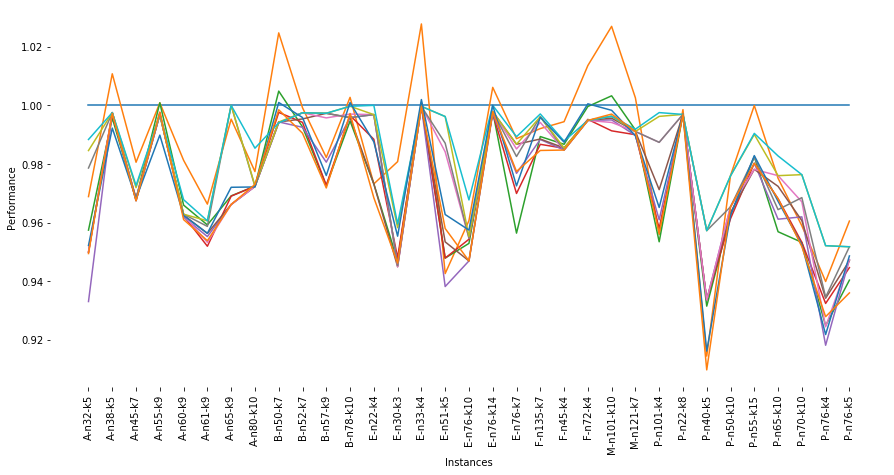

In [5]:
plt.figure(figsize=(15, 7))
ax = plt.gca()
plt.plot(scaled.drop('triangular n=500', axis=1))
ax.tick_params(axis='x', labelrotation= 90)
plt.xlabel('Instances')
plt.ylabel('Performance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Examining the significance of the results

Next, we study if the difference between both samples is significant by means of the One-Way the Wilcoxon test that allows us to study if there is enough evidence to affirm that the proposed algorithms achieve a lower cost than the original one.

In [6]:
wilcoxon_results = {}
for i in range(1, 13):
    t = wilcoxon(x = results.iloc[:, i], y=results.iloc[:, 0],  alternative='less')
    algorithm = results.columns[i]
    wilcoxon_results[algorithm] =  t[1]
pd.DataFrame(data = wilcoxon_results.values(),
             index=wilcoxon_results.keys(), columns=['p-value'])

,p-value
triangular n=500,9.999997e-01
"geometrical n=500, beta=0.1",6.295484e-04
"geometrical n=500, beta=0.2",1.488232e-06
"geometrical n=500, beta=0.3",2.956178e-07
"geometrical n=500, beta=0.4",2.694395e-07
"geometrical n=500, beta=0.5",2.694395e-07
"geometrical n=500, beta=0.6",2.694395e-07
"geometrical n=500, beta=0.7",2.694395e-07
"geometrical n=500, beta=0.8",2.694395e-07
"geometrical n=500, beta=0.9",3.976442e-07


As a conclusion we can say that the algorithms, with the exception of the one that uses triangular distribution and geometry with a beta = 0.1, manage to improve the results obtained by the CWS algorithm with 500 replicates. Being the most convenient to apply the Monte Carlo selection of beta for Geometrical distribution with a range of [0.2 - 0.4]